In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
crime_df = pd.read_csv(r"C:\Users\askar\APC-20\crimedata.csv")
crime_df

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,56216,3.07,6.87,61.68,15.23,29.86,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,12251,2.68,21.18,76.65,1.52,1.29,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,Yucaipacity,CA,NaN,NaN,32824,2.46,0.52,92.62,0.98,11.00,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,Beevillecity,TX,NaN,NaN,13547,2.89,3.37,69.91,0.90,62.11,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


In [3]:
print(crime_df.isnull().sum())

communityName             0
state                     0
countyCode             1221
communityCode          1224
population                0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 146, dtype: int64


In [4]:
columns_to_drop = [
    'countyCode', 'communityCode', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
    'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
    'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'murders', 
    'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 
    'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 
    'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'nonViolPerPop'
]

# Drop the specified columns from the DataFrame
df_cleaned = crime_df.drop(columns=columns_to_drop)
df_cleaned.head()

,communityName,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,41.02
1,Marpletownship,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,127.56
2,Tigardcity,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,218.59
3,Gloversvillecity,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,306.64
4,Bemidjicity,MN,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,...,0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,NaN


In [5]:
for column in df_cleaned.columns:
    print(f"{column}: {df_cleaned[column].isnull().sum()}")

communityName: 0
state: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 1
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHo

In [6]:
# Drop rows with missing values in 'ViolentCrimesPerPop'
df_cleaned = df_cleaned.dropna(subset=['ViolentCrimesPerPop'])

# Get the shape of the updated DataFrame
nRow, nCol = df_cleaned.shape
print(f'There are {nRow} rows and {nCol} columns')

# Display the first few rows of the DataFrame
df_cleaned.head()

There are 1994 rows and 102 columns


,communityName,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,41.02
1,Marpletownship,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,127.56
2,Tigardcity,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,218.59
3,Gloversvillecity,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,306.64
5,Springfieldcity,MO,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,...,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,442.95


In [7]:
for column in df_cleaned.columns:
    print(f"{column}: {df_cleaned[column].isnull().sum()}")

communityName: 0
state: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 1
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly: 0
PctNotSpeakEnglWell: 0
PctLargHouseFam: 0
PctLargHo

In [8]:
df_cleaned = df_cleaned.dropna(subset=['OtherPerCap'])
# removes rows from the df_cleaned where the column OtherPerCap has missing (NaN) values.

In [9]:
df_cleaned

,communityName,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,41.02
1,Marpletownship,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,127.56
2,Tigardcity,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,218.59
3,Gloversvillecity,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,306.64
5,Springfieldcity,MO,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,...,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,442.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,...,0,18.90,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,545.75
2211,Pinevillecity,LA,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,...,0,2.24,75.16,49.12,78.79,92.85,7.3,1682.8,1.15,124.10
2212,Yucaipacity,CA,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,...,0,7.35,48.66,46.73,75.54,92.30,27.5,1195.2,0.12,353.83
2213,Beevillecity,TX,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,...,0,2.28,82.26,54.05,79.72,94.06,6.3,2142.2,0.00,691.17


In [10]:
df_cleaned.to_csv('crimedata_cleaned.csv', index=False)  # Saves the updated DataFrame to a new CSV

## Model Training

### Decision-Tree Classifier

In [11]:
crimedata_cleaned = pd.read_csv(r"C:\Users\askar\APC-20\crimedata_cleaned.csv")

In [12]:
import pandas as pd

# Select only numeric columns
numeric_data = crimedata_cleaned.select_dtypes(include=['number'])

# Find min and max values for each numeric column
min_max_values = pd.DataFrame({
    'Min': numeric_data.min(),
    'Max': numeric_data.max()
})

# Saving it to a CSV file
min_max_values.to_csv("min_max_values.csv", index=True)

print("Min and Max values for numeric columns are saved to 'min_max_values.csv'")


Min and Max values for numeric columns are saved to 'min_max_values.csv'


Mean Absolute Error: 366.3424812030075
Mean Squared Error: 294608.6609706767
Root Mean Squared Error: 542.778648226583
R-squared: 0.17485299746391347


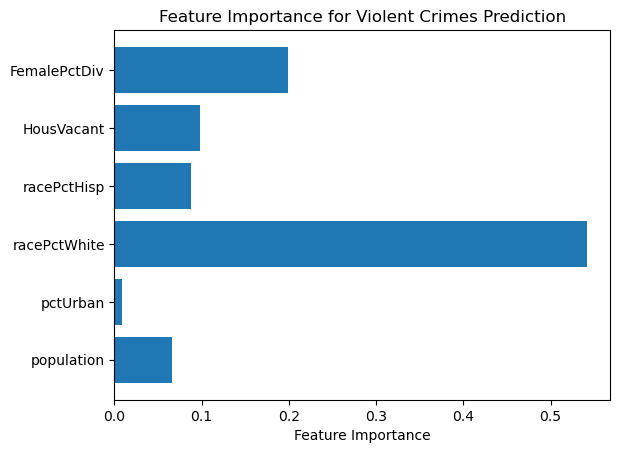

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Defining the features and target variable
features = ['population', 'pctUrban', 'racePctWhite', 'racePctHisp', 'HousVacant', 'FemalePctDiv']  # Example features
X = crimedata_cleaned[features]  # Feature set
y = crimedata_cleaned['ViolentCrimesPerPop']  # Target variable (number of violent crimes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)  # R-squared (goodness of fit)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# visualize the feature importance
import matplotlib.pyplot as plt
plt.barh(features, regressor.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Violent Crimes Prediction')
plt.show()

In [14]:
input_data = {
    'population': [50000], # We have data from 10 005.0 till 7 322 564.0
    'pctUrban': [75],  # We have data from 0 til 100 %
    'racePctWhite': [60],  # We have data from 2.68 till 99.63 %
    'racePctHisp': [30],  # We have data from 0.12 till 95.29 %
    'HousVacant': [25],  # We have data from 36 till 172 768
    'FemalePctDiv': [13]  # We have data from 3.35 till 23.46 %
}

input_df = pd.DataFrame(input_data)

predicted_violent_crimes = regressor.predict(input_df)

print(f"Predicted Violent Crimes per 100,000 people: {predicted_violent_crimes[0]}")

Predicted Violent Crimes per 100,000 people: 1339.48


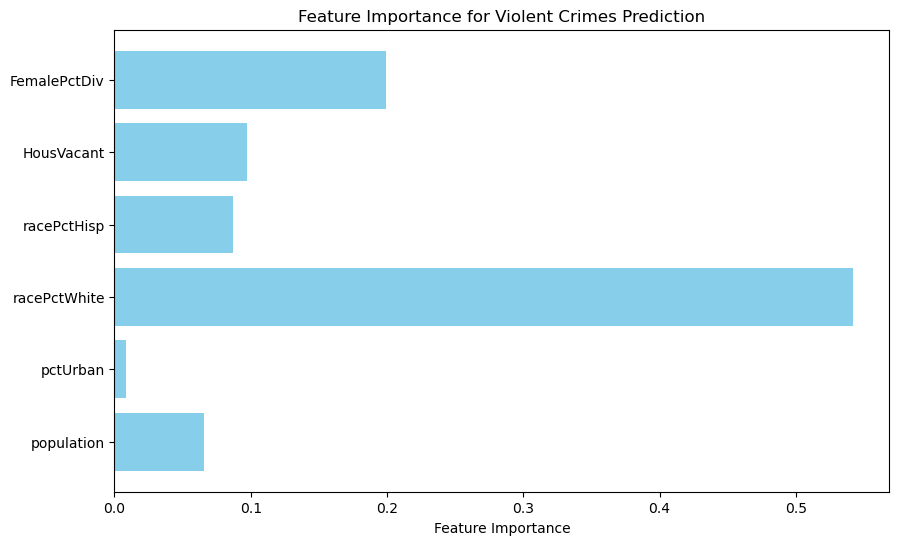

Feature Importances:
population: 0.0657
pctUrban: 0.0082
racePctWhite: 0.5416
racePctHisp: 0.0873
HousVacant: 0.0976
FemalePctDiv: 0.1995


In [15]:
import matplotlib.pyplot as plt

feature_importances = regressor.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Violent Crimes Prediction')
plt.show()

feature_importance_dict = dict(zip(features, feature_importances))
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")

In [16]:
!pip install shap

In [17]:
import shap
import numpy as np
import pandas as pd

# Assuming you already have the trained 'regressor' model and the features you want to predict with

# Preparing the inaginary input data (from the provided input)
input_data = {
    'population': [50000],
    'pctUrban': [75],
    'racePctWhite': [60],
    'racePctHisp': [30],
    'HousVacant': [5],
    'FemalePctDiv': [15]
}

input_df = pd.DataFrame(input_data)

# Initializing SHAP explainer (TreeExplainer for tree-based models like Decision Tree)
explainer = shap.TreeExplainer(regressor)

# Calculating SHAP values for the provided input
shap_values = explainer.shap_values(input_df)

# Visualizing the SHAP values (feature contributions)
shap.initjs()  # Initialize SHAP's JavaScript visualization
shap.force_plot(explainer.expected_value, shap_values[0], input_df)

# Gradient Boosting Regressor

Mean Absolute Error: 257.5407
Mean Squared Error: 153532.3275
Root Mean Squared Error: 391.8320
R-squared: 0.5700


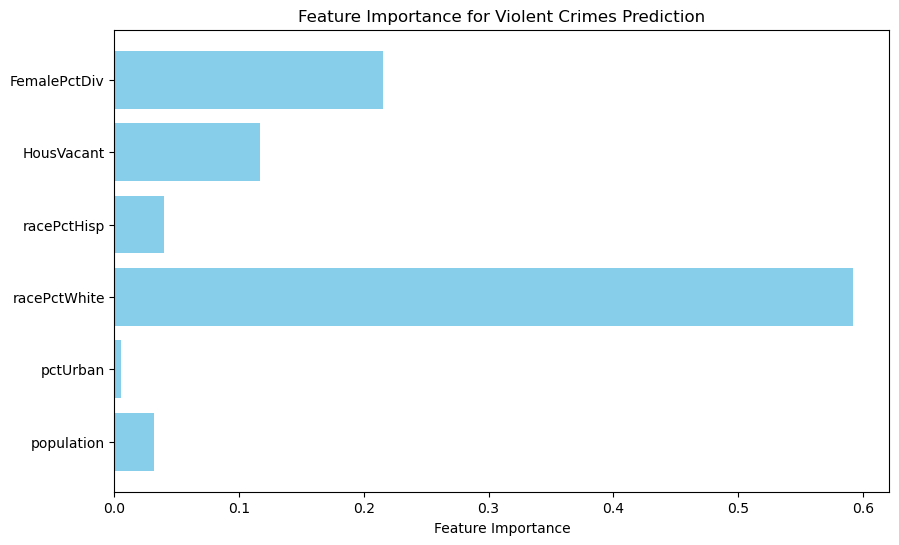


Feature Importances:
population: 0.0313
pctUrban: 0.0052
racePctWhite: 0.5917
racePctHisp: 0.0398
HousVacant: 0.1166
FemalePctDiv: 0.2155


In [18]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

crimedata_cleaned = pd.read_csv(r"C:\Users\askar\APC-20\crimedata_cleaned.csv")

features = ['population', 'pctUrban', 'racePctWhite', 'racePctHisp', 'HousVacant', 'FemalePctDiv']  # Example features
X = crimedata_cleaned[features]  # Feature set
y = crimedata_cleaned['ViolentCrimesPerPop']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)  # R-squared (goodness of fit)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

feature_importances = regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Violent Crimes Prediction')
plt.show()

feature_importance_dict = dict(zip(features, feature_importances))
print("\nFeature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")


# XGBoost

Mean Absolute Error: 256.4672
Mean Squared Error: 154363.6637
Root Mean Squared Error: 392.8914
R-squared: 0.5677


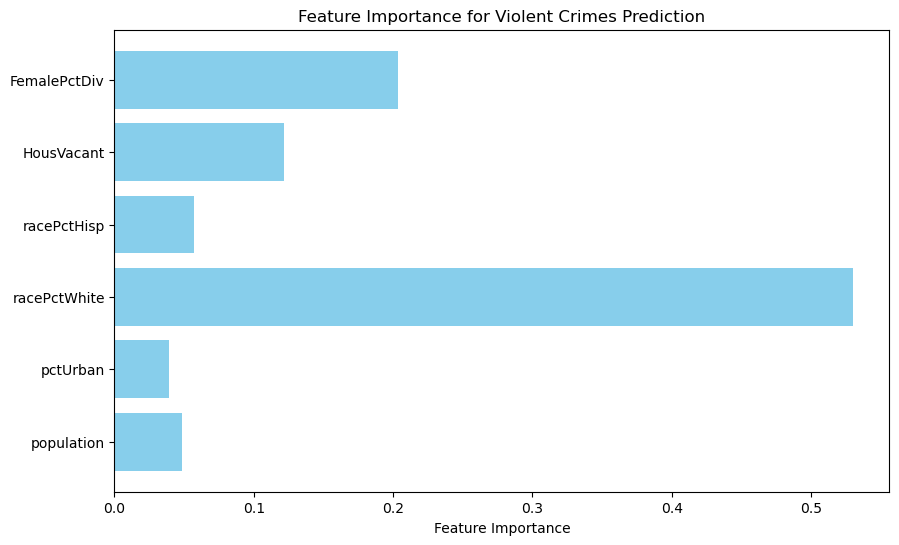


Feature Importances:
population: 0.0485
pctUrban: 0.0390
racePctWhite: 0.5298
racePctHisp: 0.0574
HousVacant: 0.1217
FemalePctDiv: 0.2036


In [19]:
from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)  # R-squared (goodness of fit)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

feature_importances = regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Violent Crimes Prediction')
plt.show()

feature_importance_dict = dict(zip(features, feature_importances))
print("\nFeature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")

# RFE

In [20]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Load data
crimedata_cleaned = pd.read_csv(r"C:\Users\askar\APC-20\crimedata_cleaned.csv")

# Define features and target
features = ['population', 'pctUrban', 'racePctWhite', 'racePctHisp', 'HousVacant', 'FemalePctDiv']  # Example features
X = crimedata_cleaned[features]
y = crimedata_cleaned['ViolentCrimesPerPop']

# Define the model
model = DecisionTreeRegressor(random_state=42)

# Apply Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=3)  # Select top 3 features
rfe.fit(X, y)

# Get RFE results
selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Rankings:", dict(zip(features, ranking)))

Selected Features: ['racePctWhite', 'HousVacant', 'FemalePctDiv']
Feature Rankings: {'population': 3, 'pctUrban': 4, 'racePctWhite': 1, 'racePctHisp': 2, 'HousVacant': 1, 'FemalePctDiv': 1}


In [21]:
# Load dataset
data = pd.read_csv(r"C:\Users\askar\APC-20\crimedata_cleaned.csv")

# Define features (X) and target (y)
X = data.drop(columns=['ViolentCrimesPerPop', 'state', 'communityName'])  # Exclude the variables
y = data['ViolentCrimesPerPop']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Applying Recursive Feature Elimination
rfe = RFE(estimator=linear_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Identify selected features
selected_features_rfe = X_train.columns[rfe.support_]
ranking_rfe = dict(zip(X_train.columns, rfe.ranking_))

# Print selected features and rankings
print("RFE Selected Features:")
print(selected_features_rfe)
print("\nRFE Feature Rankings:")
for feature, rank in ranking_rfe.items():
    print(f"{feature}: {rank}")

RFE Selected Features:
Index(['MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctKids2Par', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctHousOwnOcc'],
      dtype='object')

RFE Feature Rankings:
population: 88
householdsize: 38
racepctblack: 13
racePctWhite: 42
racePctAsian: 27
racePctHisp: 70
agePct12t21: 25
agePct12t29: 9
agePct16t24: 51
agePct65up: 35
numbUrban: 87
pctUrban: 54
medIncome: 73
pctWWage: 16
pctWFarmSelf: 30
pctWInvInc: 41
pctWSocSec: 36
pctWPubAsst: 12
pctWRetire: 11
medFamInc: 75
perCapInc: 82
whitePerCap: 76
blackPerCap: 84
indianPerCap: 80
AsianPerCap: 81
OtherPerCap: 78
HispPerCap: 79
NumUnderPov: 77
PctPopUnderPov: 48
PctLess9thGrade: 6
PctNotHSGrad: 14
PctBSorMore: 39
PctUnemployed: 28
PctEmploy: 17
PctEmplManu: 20
PctEmplProfServ: 19
PctOccupManu: 56
PctOccupMgmtProf: 18
MalePctDivorce: 1
MalePctNevMarr: 15
FemalePctDiv: 1
TotalPctDiv: 1
PersPerFam: 1
PctFam2Par: 40
PctKids2Par: 1
PctYoungKi

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso

# pipeline to scale features and apply LASSO
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', Lasso(alpha=10, random_state=42))  # Adjust alpha as needed
])

lasso_pipeline.fit(X_train, y_train) # LASSO model

# Get feature coefficients from LASSO
lasso_model = lasso_pipeline.named_steps['lasso']
lasso_coefficients = lasso_model.coef_

# Map coefficients to feature names
lasso_feature_importance = dict(zip(X_train.columns, lasso_coefficients))

print("\nLASSO Feature Importances:")
for feature, coef in lasso_feature_importance.items():
    print(f"{feature}: {coef:.4f}")

# Identify features with non-zero coefficients (selected features)
selected_features_lasso = [feature for feature, coef in lasso_feature_importance.items() if coef != 0]
print("\nLASSO Selected Features:")
print(selected_features_lasso)


LASSO Feature Importances:
population: -0.0000
householdsize: 0.0000
racepctblack: 134.3066
racePctWhite: -10.5402
racePctAsian: -0.0000
racePctHisp: 0.0000
agePct12t21: -0.0000
agePct12t29: -15.6390
agePct16t24: -0.0000
agePct65up: -0.0000
numbUrban: -0.0000
pctUrban: 45.5193
medIncome: -0.0000
pctWWage: -0.0000
pctWFarmSelf: 0.0000
pctWInvInc: -0.0000
pctWSocSec: -0.0000
pctWPubAsst: 16.7420
pctWRetire: -22.6435
medFamInc: -0.0000
perCapInc: -0.0000
whitePerCap: 0.0000
blackPerCap: -3.6538
indianPerCap: -4.6521
AsianPerCap: 1.3777
OtherPerCap: 16.1564
HispPerCap: 0.0000
NumUnderPov: -0.0000
PctPopUnderPov: -0.0000
PctLess9thGrade: -0.4723
PctNotHSGrad: 0.0000
PctBSorMore: -0.0000
PctUnemployed: -0.0000
PctEmploy: 0.0000
PctEmplManu: -10.7333
PctEmplProfServ: -9.0095
PctOccupManu: -0.0000
PctOccupMgmtProf: -0.0000
MalePctDivorce: 37.9272
MalePctNevMarr: 0.0000
FemalePctDiv: 0.0000
TotalPctDiv: 0.0000
PersPerFam: 0.0000
PctFam2Par: -0.0000
PctKids2Par: -239.5020
PctYoungKids2Par: -25.

Evaluate Linear Regression with RFE-selected features:

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score
# Train model on RFE-selected features
linear_model.fit(X_train[selected_features_rfe], y_train)

# Predict and evaluate on test set
y_pred_rfe = linear_model.predict(X_test[selected_features_rfe])
print("\nRFE Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rfe))
print("R-squared:", r2_score(y_test, y_pred_rfe))


RFE Model Performance:
MAE: 303.36853721111424
R-squared: 0.4936348686304045


Evaluate Linear Regression with LASSO-selected features:

In [24]:
# Training model on LASSO-selected features
linear_model.fit(X_train[selected_features_lasso], y_train)

# Predict and Test outcomes
y_pred_lasso = linear_model.predict(X_test[selected_features_lasso])
print("\nLASSO Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R-squared:", r2_score(y_test, y_pred_lasso))


LASSO Model Performance:
MAE: 254.43169578797134
R-squared: 0.5903983835160879
